## Introduction: 
- This Notebook for beginners who wants to know how we handle this data and make a prediction
- first import some libraries 


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## 1. Load The data

In [9]:
df = pd.read_csv('../input/creditcardfraud/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [16]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [17]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,3.918649e-15,5.682686e-16,-8.761736e-15,2.811118e-15,-1.552103e-15,2.040130e-15,-1.698953e-15,-1.893285e-16,-3.147640e-15,...,1.473120e-16,8.042109e-16,5.282512e-16,4.456271e-15,1.426896e-15,1.701640e-15,-3.662252e-16,-1.217809e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [18]:
non_fraud = len(df[df.Class == 0])
fraud = len(df[df.Class == 1])
fraud_percent = (fraud / (fraud + non_fraud)) * 100
print("Number of Genuine transactions: ", non_fraud)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Fraud transactions: {:.4f}".format(fraud_percent))


Number of Genuine transactions:  284315
Number of Fraud transactions:  492
Percentage of Fraud transactions: 0.1727


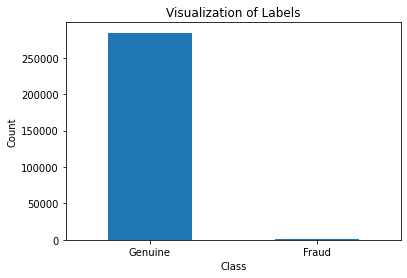

In [19]:
labels = ["Genuine", "Fraud"]
count_classes = df.value_counts(df['Class'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

- The genuine transactions are over 99%!.

- Let’s apply scaling techniques on the features “Amount - Time” to transform the range of values. We drop the original “Amount - Time” columns and add a new columns with the scaled values.

## 2. Scaling features

In [10]:
from sklearn.preprocessing import RobustScaler
rs = RobustScaler()
df['scaled_amount'] = rs.fit_transform(df['Amount'].values.reshape(-1,1))
df['scaled_time'] = rs.fit_transform(df['Time'].values.reshape(-1,1))

df.drop(['Time', 'Amount'], axis=1, inplace=True)
scaled_amount = df['scaled_amount']
scaled_time = df['scaled_time']
df.drop(['scaled_amount', 'scaled_time'], axis=1, inplace=True)
df.insert(0, 'scaled_amount', scaled_amount)
df.insert(0, 'scaled_time', scaled_time)
df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0


- Now the data is ready, Let's Try some models without SMOTE

## 3. Try The model without SMOTE

In [11]:
x = df.drop(["Class"], axis= 1)
y = df["Class"]
from sklearn.model_selection import train_test_split
(x_train, x_test, y_train, y_test) = train_test_split(x, y, test_size= 0.2, random_state= 42)
print("Shape of train_X: ", x_train.shape)
print("Shape of test_X: ", x_test.shape)


Shape of train_X:  (227845, 30)
Shape of test_X:  (56962, 30)


We import the models and make a function to print the classification report for each model.

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, accuracy_score
def metrics(actuals, predictions):
    print("Accuracy: {:.5f}".format(accuracy_score(actuals, predictions)))
    print("Precision: {:.5f}".format(precision_score(actuals, predictions)))
    print("Recall: {:.5f}".format(recall_score(actuals, predictions)))
    print("F1-score: {:.5f}".format(f1_score(actuals, predictions)))



- Now we will do the same thing with all model so I decided to make a function instead of repeat all these lines 5 times

In [13]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')


Evaluation of BaggingClassifier  without SMOTE

Accuracy: 0.99953
Precision: 0.96104
Recall: 0.75510
F1-score: 0.84571


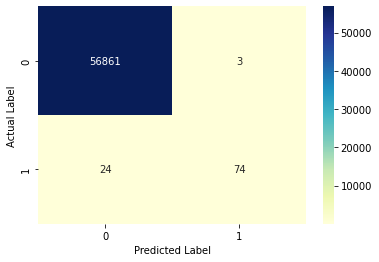

In [14]:
print('Evaluation of BaggingClassifier  without SMOTE')
result(BaggingClassifier, x_train, y_train, x_test, y_test)

Evaluation of DecisionTreeClassifier  without SMOTE

Accuracy: 0.99916
Precision: 0.72727
Recall: 0.81633
F1-score: 0.76923


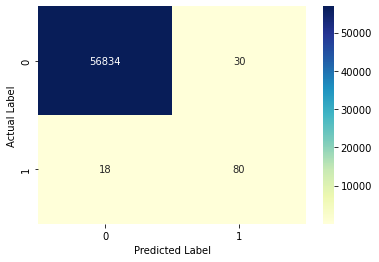

In [15]:
print('Evaluation of DecisionTreeClassifier  without SMOTE')
result(DecisionTreeClassifier, x_train, y_train, x_test, y_test)

Evaluation of RandomForestClassifier without SMOTE

Accuracy: 0.99960
Precision: 0.97468
Recall: 0.78571
F1-score: 0.87006


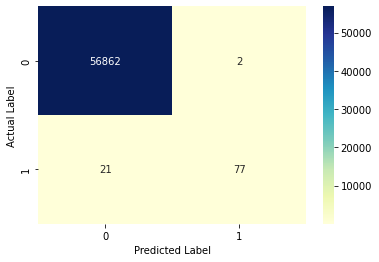

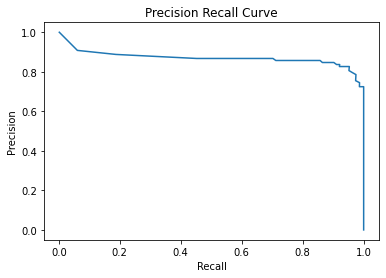

In [34]:
print('Evaluation of RandomForestClassifier without SMOTE')

result(RandomForestClassifier, x_train, y_train, x_test, y_test)

Evaluation of AdaBoostClassifier  Befor SMOTE

Accuracy: 0.99932
Precision: 0.85542
Recall: 0.72449
F1-score: 0.78453


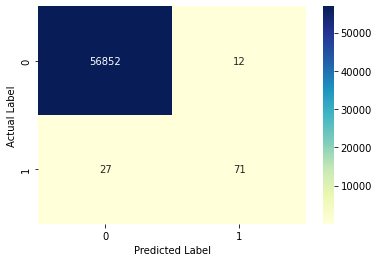

In [17]:
print('Evaluation of AdaBoostClassifier  Befor SMOTE')

result(AdaBoostClassifier, x_train, y_train, x_test, y_test)

Before OverSampling, counts of label '1': 394
Before OverSampling, counts of label '0': 227451 

After OverSampling, the shape of train_x: (454902, 30)
After OverSampling, the shape of train_y: (454902,) 

After OverSampling, counts of label '1', %: 50.0
After OverSampling, counts of label '0', %: 50.0


<AxesSubplot:xlabel='Class', ylabel='count'>

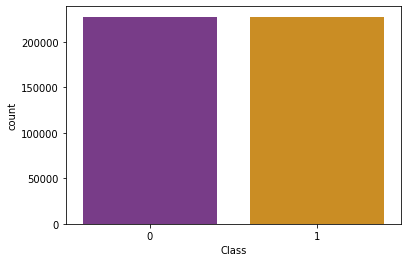

In [18]:
from imblearn.over_sampling import SMOTE
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

sm = SMOTE(random_state=2)
x_train_s, y_train_s = sm.fit_resample(x_train, y_train)

print('After OverSampling, the shape of train_x: {}'.format(x_train_s.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_s.shape))

print("After OverSampling, counts of label '1', %: {}".format(sum(y_train_s==1)/len(y_train_s)*100.0,2))
print("After OverSampling, counts of label '0', %: {}".format(sum(y_train_s==0)/len(y_train_s)*100.0,2))

sns.countplot(x=y_train_s, data=df, palette='CMRmap')


## 4. Applying Models With SMOTE:
### We will use the same function but add a simple part to print "Precision Recall Curve"

In [19]:
def result (model, x_train, y_train, x_test, y_test):
    x = model()
    x.fit(x_train, y_train)
    y_pred = x.predict(x_test)
    cnf_matrix = confusion_matrix(y_test, y_pred)
    print()
    metrics(y_test, y_pred.round())

    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()
    
    y_pred_prob = x.predict_proba(x_test)[:,1]
    precision, recall, thresholds = precision_recall_curve(y_test, y_pred_prob)
    plt.plot(precision, recall)
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.title('Precision Recall Curve')
    plt.show()


Evaluation of BaggingClassifier After SMOTE

Accuracy: 0.99905
Precision: 0.68966
Recall: 0.81633
F1-score: 0.74766


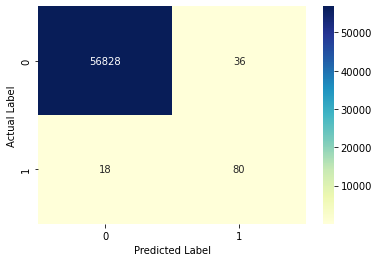

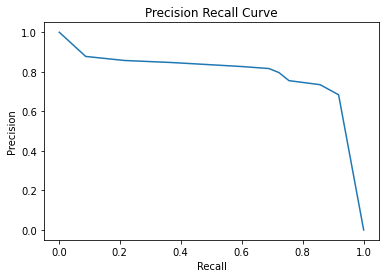

In [20]:
print('Evaluation of BaggingClassifier After SMOTE')
result(BaggingClassifier, x_train_s, y_train_s, x_test, y_test)

Evaluation of DecisionTreeClassifier After SMOTE

Accuracy: 0.99775
Precision: 0.41848
Recall: 0.78571
F1-score: 0.54610


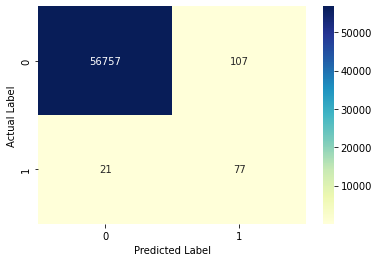

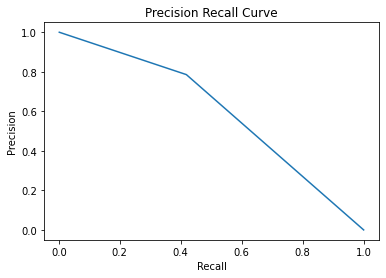

In [21]:
print('Evaluation of DecisionTreeClassifier After SMOTE')
result(DecisionTreeClassifier, x_train_s, y_train_s, x_test, y_test)

Evaluation of RandomForestClassifier After SMOTE

Accuracy: 0.99961
Precision: 0.91304
Recall: 0.85714
F1-score: 0.88421


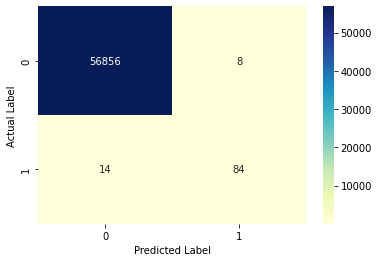

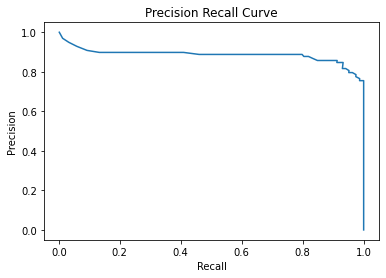

In [35]:
print('Evaluation of RandomForestClassifier After SMOTE')
result(RandomForestClassifier, x_train_s, y_train_s, x_test, y_test)

- Let's know what are the features are importance in RandomForestClassifier model.

Feature importance ranking


1.V14(0.181998)
2.V10(0.140909)
3.V4(0.101895)
4.V11(0.100557)
5.V12(0.091767)
6.V17(0.076077)
7.V16(0.051611)
8.V2(0.033528)
9.V7(0.028884)
10.V3(0.020523)
11.V18(0.016015)
12.V21(0.014929)
13.V8(0.013096)
14.scaled_amount(0.012987)
15.V9(0.012363)
16.V5(0.011725)
17.V1(0.010033)
18.V19(0.008594)
19.V26(0.007983)
20.V6(0.007517)
21.scaled_time(0.007094)
22.V13(0.006703)
23.V20(0.006600)
24.V27(0.005954)
25.V15(0.005814)
26.V25(0.005591)
27.V24(0.005347)
28.V28(0.004980)
29.V23(0.004738)
30.V22(0.004189)


<BarContainer object of 30 artists>

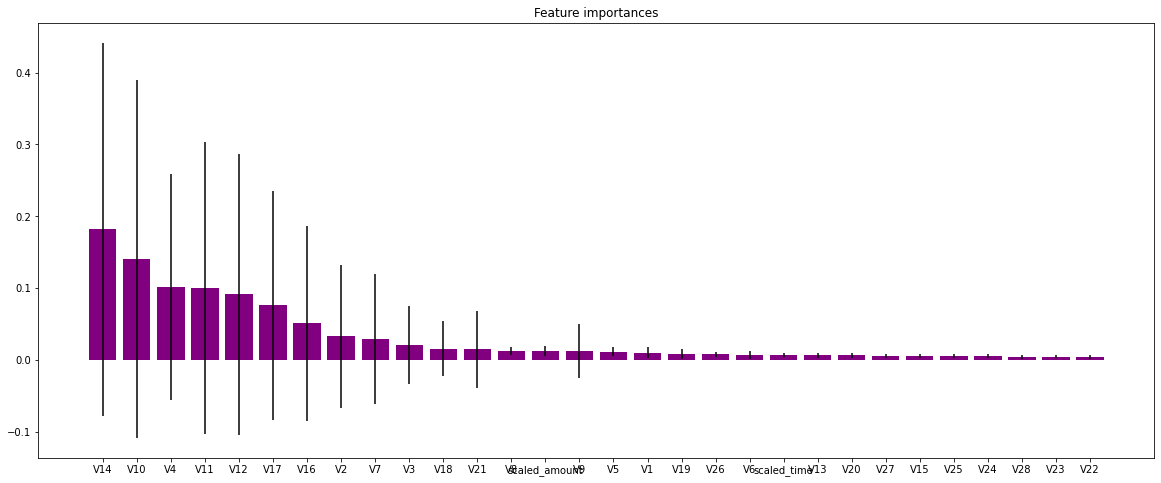

In [23]:
print('Feature importance ranking\n\n')
rf= RandomForestClassifier()
rf.fit(x_train_s, y_train_s)
y_pred = rf.predict(x_test)
importances = rf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rf.estimators_],axis=0)
indices = np.argsort(importances)[::-1]
variables = df.columns
importance_list = []
for f in range(x.shape[1]):
    variable = variables[indices[f]]
    importance_list.append(variable)
    print("%d.%s(%f)" % (f + 1, variable, importances[indices[f]]))
plt.figure(figsize=(20, 8))
plt.title("Feature importances")
plt.bar(importance_list, importances[indices],
       color="purple", yerr=std[indices], align='center')


Evaluation of AdaBoostClassifier After SMOTE

Accuracy: 0.97651
Precision: 0.06461
Recall: 0.93878
F1-score: 0.12089


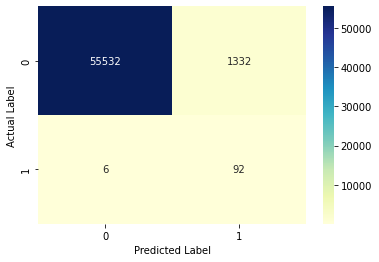

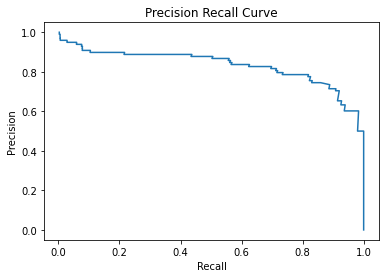

In [24]:
print('Evaluation of AdaBoostClassifier After SMOTE')
result(AdaBoostClassifier, x_train_s, y_train_s, x_test, y_test)

### 4. Neural Network

In [25]:
n_inputs = x_train_s.shape[1]

In [26]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
model = Sequential([
    Dense(n_inputs, input_shape=(n_inputs, ), activation='relu'),
    Dense(32, activation='relu'),
    Dense(2, activation='softmax')])
model.compile(optimizer='Adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train_s, y_train_s, validation_split=0.2, batch_size=300, epochs=25, shuffle=True, verbose=2)



User settings:

   KMP_AFFINITY=granularity=fine,verbose,compact,1,0
   KMP_BLOCKTIME=0
   KMP_DUPLICATE_LIB_OK=True
   KMP_INIT_AT_FORK=FALSE
   KMP_SETTINGS=1
   KMP_WARNINGS=0

Effective settings:

   KMP_ABORT_DELAY=0
   KMP_ADAPTIVE_LOCK_PROPS='1,1024'
   KMP_ALIGN_ALLOC=64
   KMP_ALL_THREADPRIVATE=128
   KMP_ATOMIC_MODE=2
   KMP_BLOCKTIME=0
   KMP_CPUINFO_FILE: value is not defined
   KMP_DETERMINISTIC_REDUCTION=false
   KMP_DEVICE_THREAD_LIMIT=2147483647
   KMP_DISP_NUM_BUFFERS=7
   KMP_DUPLICATE_LIB_OK=true
   KMP_ENABLE_TASK_THROTTLING=true
   KMP_FORCE_REDUCTION: value is not defined
   KMP_FOREIGN_THREADS_THREADPRIVATE=true
   KMP_FORKJOIN_BARRIER='2,2'
   KMP_FORKJOIN_BARRIER_PATTERN='hyper,hyper'
   KMP_GTID_MODE=3
   KMP_HANDLE_SIGNALS=false
   KMP_HOT_TEAMS_MAX_LEVEL=1
   KMP_HOT_TEAMS_MODE=0
   KMP_INIT_AT_FORK=true
   KMP_LIBRARY=throughput
   KMP_LOCK_KIND=queuing
   KMP_MALLOC_POOL_INCR=1M
   KMP_NUM_LOCKS_IN_BLOCK=1
   KMP_PLAIN_BARRIER='2,2'
   KMP_PLAIN_BARRIER_P

Epoch 1/25
1214/1214 - 4s - loss: 0.0809 - accuracy: 0.9718 - val_loss: 0.0298 - val_accuracy: 0.9863
Epoch 2/25
1214/1214 - 3s - loss: 0.0192 - accuracy: 0.9945 - val_loss: 0.0091 - val_accuracy: 0.9998
Epoch 3/25
1214/1214 - 3s - loss: 0.0107 - accuracy: 0.9976 - val_loss: 0.0108 - val_accuracy: 0.9990
Epoch 4/25
1214/1214 - 3s - loss: 0.0073 - accuracy: 0.9984 - val_loss: 0.0036 - val_accuracy: 1.0000
Epoch 5/25
1214/1214 - 3s - loss: 0.0056 - accuracy: 0.9988 - val_loss: 0.0083 - val_accuracy: 0.9985
Epoch 6/25
1214/1214 - 3s - loss: 0.0047 - accuracy: 0.9990 - val_loss: 0.0020 - val_accuracy: 1.0000
Epoch 7/25
1214/1214 - 3s - loss: 0.0039 - accuracy: 0.9992 - val_loss: 0.0039 - val_accuracy: 0.9994
Epoch 8/25
1214/1214 - 3s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 6.2293e-04 - val_accuracy: 1.0000
Epoch 9/25
1214/1214 - 3s - loss: 0.0031 - accuracy: 0.9994 - val_loss: 0.0081 - val_accuracy: 0.9990
Epoch 10/25
1214/1214 - 3s - loss: 0.0027 - accuracy: 0.9994 - val_loss: 0.001

<AxesSubplot:>

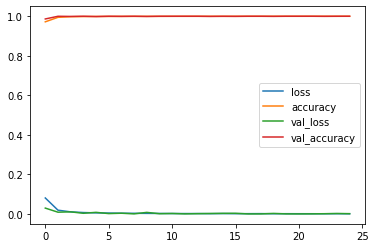

In [27]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()


In [28]:
score = model.evaluate(x_test, y_test)
print(score)


1781/1781 [==============================] - 2s 1ms/step - loss: 0.0147 - accuracy: 0.9993
[0.014656485989689827, 0.9993329048156738]


Evaluation of Neural Network Model After SMOT

Accuracy: 0.99933
Precision: 0.79412
Recall: 0.82653
F1-score: 0.81000


Text(0.5, 15.0, 'Predicted Label')

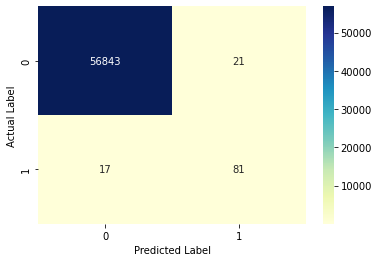

In [29]:
y_pred= np.argmax(model.predict(x_test), axis=-1) 
print('Evaluation of Neural Network Model After SMOT')
print()
metrics(y_test, y_pred.round())
nn_f1_score = f1_score(y_test, y_pred)
nn_cnf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(pd.DataFrame(nn_cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
plt.ylabel('Actual Label')
plt.xlabel('Predicted Label')


## Conclusion:
- Implementing SMOTE Technique on our imbalanced dataset helped us to balanced the data.
- Try more than algorithm and compare between them.
- After comparison between models, we found that RandomForestClassifier (Befor and After) SMOTE gave us the best result.